In [19]:
#import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [20]:
#import dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [24]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [25]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [32]:
# View all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()
#tablenames 'measurement' and 'station'
columns= inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# Base.classes.keys() 'measurement' and 'station'    
Measurement= Base.classes.measurement
Station= Base.classes.station

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [ ]:
# Save references to each table


In [33]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [59]:
# Find the most recent date in the data set.
first_row=session.query(Measurement).first()
print(first_row.__dict__)
# to_datetime= pd.to_datetime(Measurement.date, yearfirst=True)
# print(to_datetime)
results=session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).all()
dates= [results[0] for result in results]
#dates



{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000002E4BDB906D8>, 'prcp': 0.08, 'station': 'USC00519397', 'id': 1, 'tobs': 65.0, 'date': '2010-01-01'}


Text(0, 0.5, 'Inches')

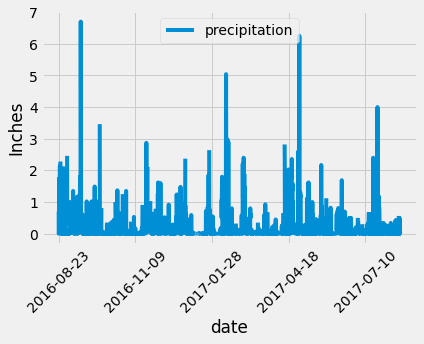

In [89]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#Same query as above- results
# Calculate the date one year from the last date in data set.
#2017-08-23 to 2016-08-23
prev_year= dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query_result= session.query(Measurement.prcp, Measurement.date).filter(Measurement.date>= prev_year)\
.order_by(Measurement.date.desc()).all()
#store into dataframe
precip_df= pd.DataFrame(query_result, columns=['precipitation', 'date'])


# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df=precip_df.set_index('date')
# precip_df
# Sort the dataframe by date
precip_df= precip_df.sort_index()
# precip_df
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(rot= 45)
plt.ylabel('Inches')



In [62]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,preciptation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [63]:
# Design a query to calculate the total number stations in the dataset
total_stations= session.query(func.count(Station.station))

In [69]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations=session.query(Measurement.station, func.count(Measurement.station))\
.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [91]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station = [func.avg(Measurement.tobs), 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs)]
most_active= session.query(*station).filter(Measurement.station == 'USC00519281').all()
most_active

[(71.66378066378067, 54.0, 85.0)]

Text(0.5, 1.0, 'USC00519281 Measurements')

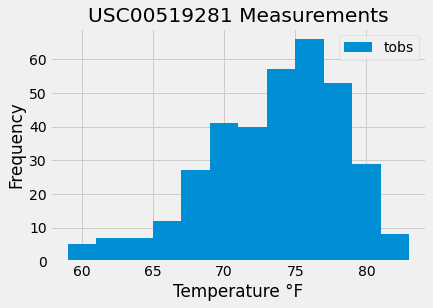

In [93]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs=session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281')\
.filter(Measurement.date >= prev_year).all()
tobs_df= pd.DataFrame(tobs,columns= ['tobs'])
tobs_df.plot.hist(bins= 12)
plt.xlabel('Temperature °F')
plt.title('USC00519281 Measurements')

# Close session

In [ ]:
# Close Session
session.close()